### Setup

In [1]:
# install dependencies
!rm -r Neural_Networks-101-demo
!git clone -b explanations https://github.com/KiranArun/Neural_Networks-101-demo.git
!python3 /content/Neural_Networks-101-demo/scripts/setup.py helper_funcs

Cloning into 'Neural_Networks-101-demo'...
remote: Counting objects: 383, done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 383 (delta 40), reused 82 (delta 20), pack-reused 271
Receiving objects: 100% (383/383), 9.39 MiB | 14.74 MiB/s, done.
Resolving deltas: 100% (163/163), done.
Getting helper functions...


# MNIST Handwritten Digits Classifier

## Overview

We are going to predict the handwritten digit (from 0 to 9) in an image.

It will use a 2 layer Neural Network.

What we will discuss:
- Data
    - arrays ([Intro to NumPy](https://docs.scipy.org/doc/numpy/user/index.html))
    - data/datasets for ML
- Basic linear algebra ([Intro to lin alg](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab), [Run through of lin alg for ML](http://www.deeplearningbook.org/contents/linear_algebra.html))
    - scalars, vectors, matrices and tensors
    - matrix multiplication
- Neural Networks ([Intro to NNs](https://www.youtube.com/watch?v=ILsA4nyG7I0), [The NN Farm](http://www.asimovinstitute.org/neural-network-zoo/))
    - inputs/outputs
    - variables
    - training
- Optimization Technique ([Intro to Gradient descent and Back prop](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi))
    - gradient descent
    - back propagation
- Tensorflow Basics ([TF's Programmer's guide](https://www.tensorflow.org/programmers_guide/))
    - placeholders, variables
    - tensorflow graphs and sessions

In [0]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import helper_funcs as helper

from IPython.display import HTML, Image

Training:


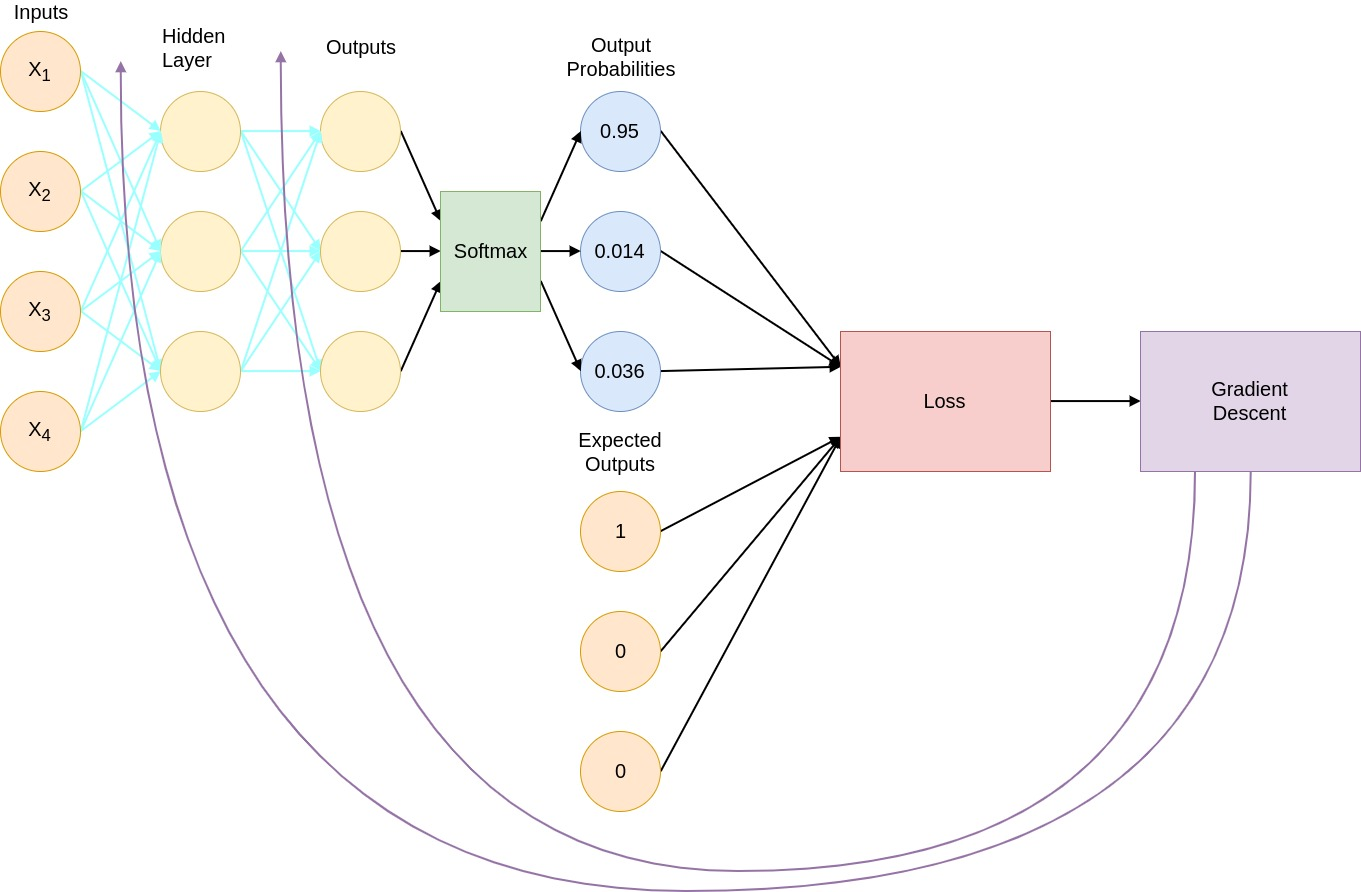

In [3]:
print('Training:')
Image('Neural_Networks-101-demo/imgs/Neural_Nets_overview.jpg',width=750)

Testing:


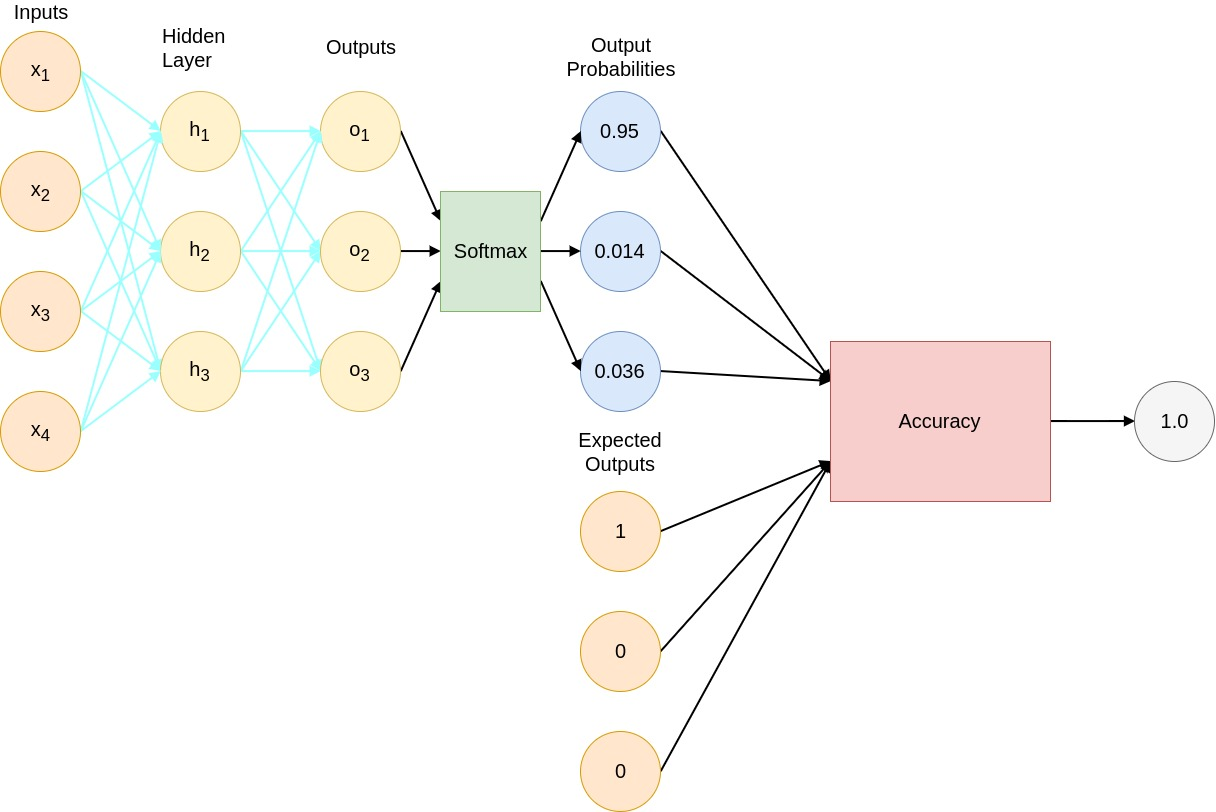

In [4]:
print('Testing:')
Image('Neural_Networks-101-demo/imgs/Neural_Nets_testing.jpg',width=750)

Inference:


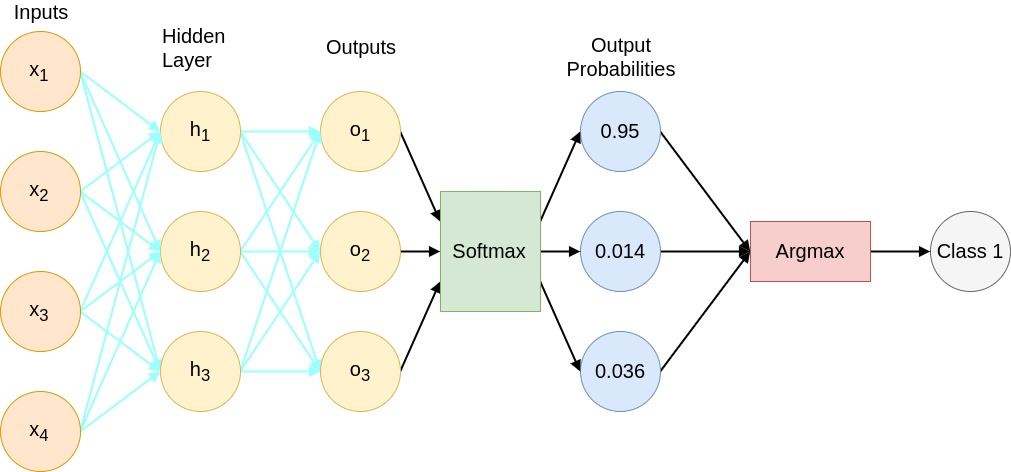

In [5]:
print('Inference:')
Image('Neural_Networks-101-demo/imgs/Neural_Nets_inference.jpg',width=750)

## Data

In [6]:
# this is the directory where we will keep and external files, eg. data, logs
model_root_dir = '/content/'

# get data
mnist = helper.MNIST_data(model_root_dir+'MNIST_data/')

Download complete.
Save complete.


In [0]:
image_dims = (28,28)  # the image dimensions
input_size = 28**2    # the unstacked image size
num_classes = 10      # the number of classes to predict

### Input Data

**The Images:**
- 28x28 pixels
- 1 channel, valued 0-1 (pixel intensity).
- each image is a matrix

Example:
$\left[ \begin{array}{ccc} 
0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.47 & 0.95 & 0.88 & 0.27 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.32 & 0.82 & 0.13 & 0.54 & 0.39 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.61 & 0.15 & 0.36 & 0.73 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.53 & 0.92 & 0.78 & 0.06 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.18 & 0.79 & 0.76 & 0.32 & 0.62 & 0.02 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.46 & 0.51 & 0.01 & 0.14 & 0.81 & 0.05 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.11 & 0.93 & 0.88 & 0.96 & 0.41 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.01 & 0.17 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 \\
\end{array} \right]$

We unstack each image into a vector, this is so we can treat the image as a datapoint in a 784 dimensional space.

Example ($x_{i,j}$ = a pixel in $x$):
$\left[ \begin{array}{ccc} 
x_{0,0} & x_{0,1} & x_{0,2} &  & \dots & x_{28,28}
\end{array} \right]$

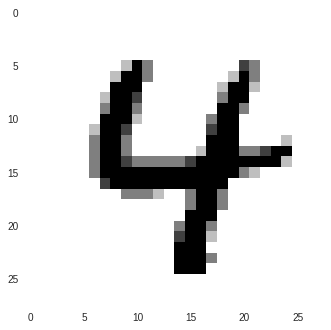

In [8]:
# show example image

# choose image index from training set
idx = 2

# plot the image
plt.imshow(mnist.train_images[idx].reshape(image_dims), cmap='binary')
plt.grid(False)
plt.show()

### Expected Output Data

**Classes and Labels:**
- 10 classes (0, 1, 2, ..., 9)
- a label contains the class the image is in
- each image is assigned 1 label
- we represent a class with a one-hot encoded vector

$\left[ \begin{array}{ccc} 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \end{array} \right]$

Corresponding values:

$\left[ \begin{array}{ccc} 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 \end{array} \right]$

The index of the 1 valued element in the one-hot vector, is the label (we can find it using $\arg \max$).

The example vector represents a 2.

In [9]:
# print label
print('label:', mnist.train_labels[idx], '\nwhich is:', np.argmax(mnist.train_labels[idx]))

label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 
which is: 4


### Data Sets

We have split up the data randomly into 3 sets:
- **training** - to train the model
- **validation** - to check how the model is training and compare models
- **testing** - once fully trained, used to test accuracy, cannot tune model once tested

We're using data with 55,000 training, 5,000 validation and 10,000 testing examples.

Each example has been unstacked and put into 1 row, $28\times28 = 784$.

In [10]:
# show data sizes
print('training data shape', mnist.train_images.shape)
print('validation data shape', mnist.validation_images.shape)
print('testing data shape', mnist.test_images.shape)

training data shape (55000, 784)
validation data shape (5000, 784)
testing data shape (10000, 784)


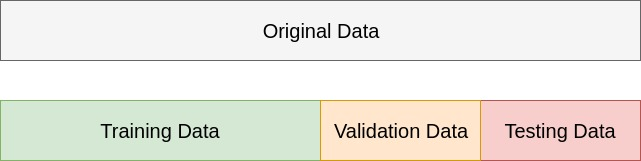

In [11]:
Image('/content/Neural_Networks-101-demo/imgs/Datasets.jpg',width=750)

Why do we need more than one dataset?

We need to make sure the Neural Net is able to generalise

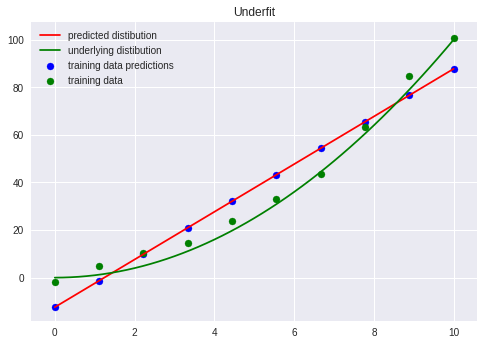

training loss: 71.19629144924298
testing loss: 75.99377834985415


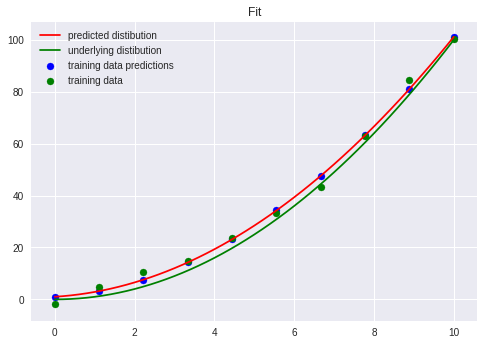

training loss: 5.077577646709167
testing loss: 7.392593047355749


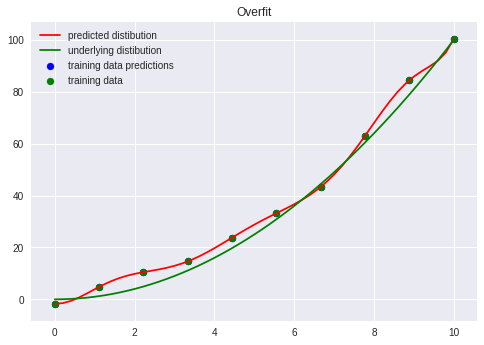

training loss: 8.158919262696002e-19
testing loss: 12.566213937511597


In [12]:
helper.show_line_fits()

Why do we need two datasets which we dont train on?

- we use the validation set to compare the performance from different models
- we pick the best one and test it using the test dataset
- datasets tend to be biased and testing overall performance with multiple models could result in us choosing a biased model

## Hyperparameters

### Batch Size

Batch size is the number of pieces of data (image and corresponding label) inputted at each step.

When we take a step, we update the variables to reduce the loss of our current input(s).

Overall, we want to reduce the loss of the whole training set.

- **Stochastic gradient descent:** We feed in one image with label, the direction of the step might not be optimal.
- **Batch gradient descent:** We feed in all images at once, the direction of the step will be optimal but it will take a long time to compute.
- **Mini-batch gradient descent:** We feed in a few images (batch size) at once, the direction of the step will be almost optimal and take quite short to compute.

We are using Mini-batch gradient descent.


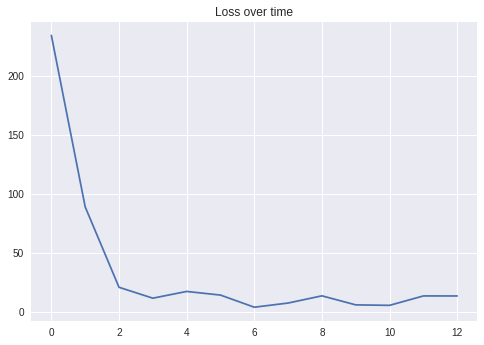

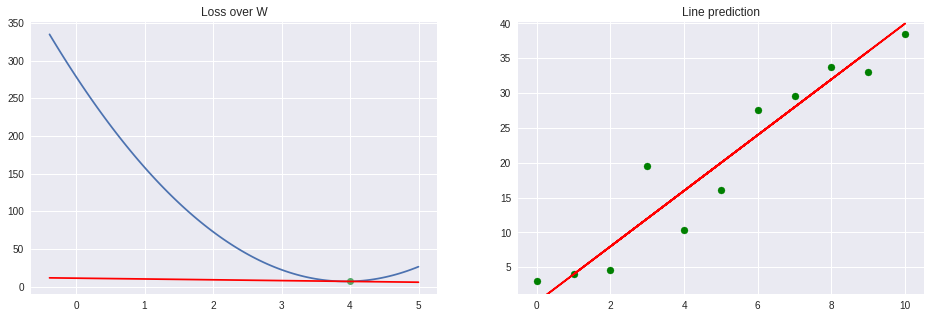

In [13]:
anim = helper.show_batch_learning(batch_size=4,epochs=4)
HTML(anim.to_jshtml())

### Learning Rate

This is the coefficient of the update we are making to the variables.

- the greater the learning rate, the bigger the steps and convergance may be faster but could lead to instability
- the smaller the learning rate, the smaller the steps and convergance will take longer, but will stay stable

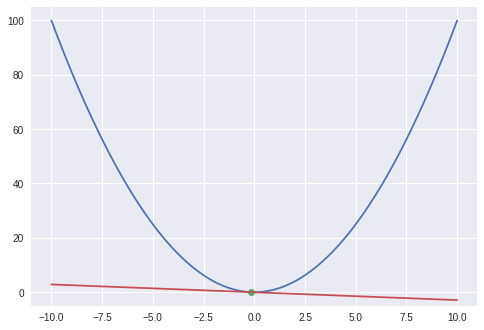

In [14]:
# change lr to the learning rate you want
# start = the starting point on the x axis
anim = helper.animate_gradient_descent(lr=0.1, start=-10)
HTML(anim.to_jshtml())

### Epochs / Iterations

**Epochs:** the number of times to feed in the whole training dataset.

**Iterations:** how many steps it takes to feed in mini batches (sized batch_size) to complete one epoch (ie input all samples just once)



### Hidden Size

The number of neurons in the hidden layer.

**Hidden layer:** Any layer in between the input and output layers

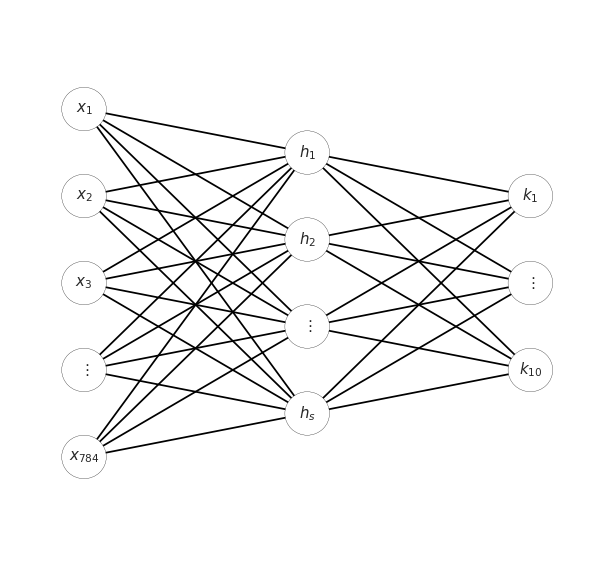

In [18]:
# s = hidden_size
names = [[r'$x_{1}$',r'$x_{2}$',r'$x_{3}$',r'$\vdots$',r'$x_{784}$'],[r'$h_1$',r'$h_{2}$',r'$\vdots$',r'$h_{s}$'],[r'$k_1$',r'$\vdots$',r'$k_{10}$']]
fig,ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
helper.draw_neural_net(ax, .1, .9, .1, .9, [5, 4, 3], names)

## Placeholders

### X

This is the input. In our case, the image unstacked into a vector.

Since we are feeding in mini-batches, we need to input multiple images at once.

Each x is a feature vector

$x_i = \left[ \begin{array}{ccc} 
x_{i_0} & x_{i_1} & x_{i_2} & \dots & x_{i_{784}}
\end{array} \right]$

We stack them as row vectors in our input array.

With $bs$ = batch_size

$X = \left[ \begin{array}{ccc} 
-x_1- \\
-x_2- \\
\vdots \\
-x_{bs}-
\end{array} \right]$

---

With Tensorflow, we need to set the shape and type of the placeholder.

- when a dimension = None, it means it will take whatever sized array dimension we give it later
- we've set the number of rows = None, so it'll take any number of images

We create placeholders in Tensorflow because it's a define-and-run system, this means:

- we have to create the whole computational graph first
- then run it

In our case, we are defining the inputs, but not running anything.

In [19]:
# this is our placeholder for X
# we cant use it yet as it doesn't have any values
X_placeholder = tf.placeholder(shape=[None, input_size], dtype=tf.float32, name='X_placeholder')

# notice how it doesn't have a value
print(X_placeholder)

Tensor("X_placeholder:0", shape=(?, 784), dtype=float32)


### Y

These are the labels. In our case, the one-hot vectors.

Since we are feeding in mini-batches, we need to input multiple labels at once.

$y_i = \left[ \begin{array}{ccc} 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \end{array} \right]$

We stack them as row vectors like the images.

With $bs$ = batch_size

$Y = \left[ \begin{array}{ccc} 
-y_1- \\
-y_2- \\
\vdots \\
-y_{bs}-
\end{array} \right]$

## Variables

### W

W is our weights, what we multiply our values by.

$W = \left[ \begin{array}{ccc} 
w_{0,0} & \dots & w_{0,i} \\
\vdots & \ddots & \vdots \\
w_{k,0} & \dots & w_{k,i} \\
\end{array} \right]$

- number rows = number of features in input to current layer
- number columns = number of features in output of current layer

In [20]:
# we create the variables using tf.Variable which tells Tensorflow to update this value when back propagating
# we initialize our variables randomly
W1 = tf.Variable(np.random.randn(input_size, 128), dtype=tf.float32, name='W1')

print(W1)

<tf.Variable 'W1:0' shape=(784, 128) dtype=float32_ref>


### b

b is our bias, what we add to our values after multiplying them.

$b = \left[ \begin{array}{ccc} 
b_{0} & \dots & b_{i}
\end{array} \right]$

- number columns = number of features in $XW$

In [21]:
# we create another variable of the bias
# we also initialize these randomly
b1 = tf.Variable(np.random.randn(128), dtype=tf.float32, name='b1')

print(b1)

<tf.Variable 'b1:0' shape=(128,) dtype=float32_ref>


## Forward Pass

This is the part where we make the predictions.

We input the image, apply the operations in order and then get the output of the neural network.

We do this during:
- training
- testing
- inference

### Matrix Multiplication

We are using linear algebra and we multiply in a special way.

Lets look at an example with just one image as input:

$x = \left[ \begin{array}{ccc} 
x_{0} & x_{1} & x_{2} & \dots & x_{784}
\end{array} \right]$
 

$W = \left[ \begin{array}{ccc} 
w_{0,0} & \dots & w_{0,s} \\
\vdots & \ddots & \vdots \\
w_{784,0} & \dots & w_{784,s} \\
\end{array} \right]$
 

$\left[ \begin{array}{ccc} 
x_{0} & x_{1} & x_{2} & \dots & x_{784}
\end{array} \right] 
\left[ \begin{array}{ccc} 
w_{0,0} & \dots & w_{0,s} \\
\vdots & \ddots & \vdots \\
w_{784,0} & \dots & w_{784,s} \\
\end{array} \right]
= \left[ \begin{array}{ccc} 
h_{0} & h_{1} & h_{2} & \dots & h_{s}
\end{array} \right] $
 

- left matrix columns = right matrix rows
- multiply each left matrix row with each right matrix column
- sum the result to get a scalar
- place in output matrix based on row of first matrix and column of second
- output matrix shape = left matrix rows = right matrix columns

##### A simpler example

$AB = C$

$A = 
\left[ \begin{array}{ccc} 
1 & 2 & 3
\end{array} \right]$

$B = 
\left[ \begin{array}{ccc} 
4 \\
5 \\
6
\end{array} \right]$

$AB = 
\left[ \begin{array}{ccc} 
1 & 2 & 3
\end{array} \right]
\left[ \begin{array}{ccc} 
4 \\
5 \\
6
\end{array} \right]$

$AB = 
\left[ \begin{array}{ccc} 
(1\times 4) + (2\times 5) + (3\times 6)
\end{array} \right]$

$AB =
\left[ \begin{array}{ccc} 
32
\end{array} \right]$

---

$AB = C$

$A = 
\left[ \begin{array}{ccc} 
1 & 2 \\
3 & 4
\end{array} \right]$

$B = 
\left[ \begin{array}{ccc} 
1 & 2 & 3\\
4 & 5 & 6\\
\end{array} \right]$

$AB =
\left[ \begin{array}{ccc} 
1 & 2 \\
3 & 4
\end{array} \right]
\left[ \begin{array}{ccc} 
1 & 2 & 3\\
4 & 5 & 6\\
\end{array} \right]$

$AB =
\left[ \begin{array}{ccc} 
(1\times 1) + (2\times 4) & (1\times 2) + (2\times 5)  & (1\times 3) + (2\times 6)  \\
(3\times 1) + (4\times 4) & (3\times 2) + (4\times 5)  & (3\times 3) + (4\times 6)
\end{array} \right]$

$AB =
\left[ \begin{array}{ccc} 
9 & 12  & 15  \\
19 & 26  & 33
\end{array} \right]$

---

$AB = C$

$A = 
\left[ \begin{array}{ccc} 
a_{0,0} & \dots & a_{0,j} \\
\vdots & \ddots & \vdots \\
a_{i,0} & \dots & a_{i,j}
\end{array} \right]$

$B = 
\left[ \begin{array}{ccc} 
b_{0,0} & \dots & b_{0,k} \\
\vdots & \ddots & \vdots \\
b_{j,0} & \dots & b_{j,k}
\end{array} \right]$

$AB = 
\left[ \begin{array}{ccc} 
a_{0,0} & \dots & a_{0,j} \\
\vdots & \ddots & \vdots \\
a_{i,0} & \dots & a_{i,j}
\end{array} \right]
\left[ \begin{array}{ccc} 
b_{0,0} & \dots & b_{0,k} \\
\vdots & \ddots & \vdots \\
b_{j,0} & \dots & b_{j,k}
\end{array} \right]$

$AB =
\left[ \begin{array}{ccc} 
\sum A_{0,:}B_{:,0} & \dots & \sum A_{0,:}B_{:,k} \\
\vdots & \ddots & \vdots \\
\sum A_{i,:}B_{:,0} & \dots & \sum A_{i,:}B_{:,k} 
\end{array} \right]$

$c_{i,j} = \sum A_{i,:}B_{:,j}$

---

What you need to know:

- as input, we feed in row vectors stacked with the columns = features (neurons)
- the output is row vectors stacked with columns = new number of features (neurons)
- each new feature, is a weighted combination of all previous features
- if we feed in multiple inputs (rows > 1), the output keeps the rows to them selves

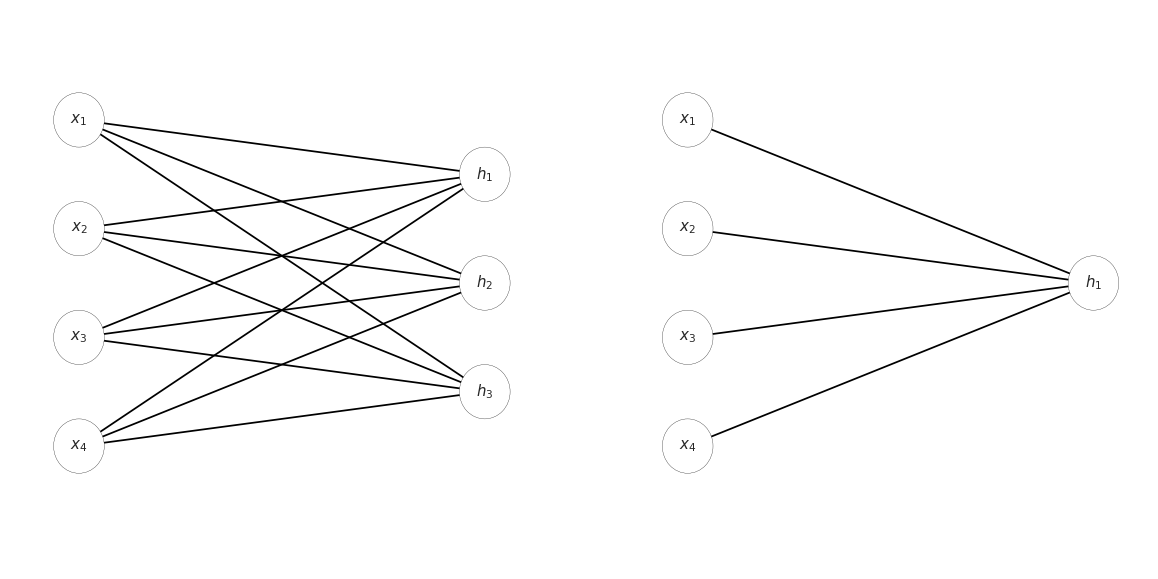

In [22]:
names = [[r'$x_{1}$',r'$x_{2}$',r'$x_{3}$',r'$x_{4}$'],[r'$h_1$',r'$h_{2}$',r'$h_{3}$']]
fig,ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].axis('off')
ax[1].axis('off')
helper.draw_neural_net(ax[0], .1, .9, .1, .9, [4, 3], names)
helper.draw_neural_net(ax[1], .1, .9, .1, .9, [4, 1], names)

In [23]:
# example code
# try changing A and B and see the result
A = np.arange(4).reshape(2,2)+1
B = np.arange(6).reshape(2,3)+1

print('A =\n', A)
print('B =\n', B)

C = np.matmul(A,B)

print('C =\n', C)

A =
 [[1 2]
 [3 4]]
B =
 [[1 2 3]
 [4 5 6]]
C =
 [[ 9 12 15]
 [19 26 33]]


### Addition

We add a bias ($b$) to the matrix multiplication output ($XW$) so that we can model a linear function which doesn't go through the origin.

Lets look at an example with just one image as input:

$XW =
\left[ \begin{array}{ccc} 
h_{0} & \dots & h_{s}
\end{array} \right]$

$b = \left[ \begin{array}{ccc} 
b_{0} & \dots & b_{s}
\end{array} \right]$

$XW + b =
\left[ \begin{array}{ccc} 
h_{0}+b_{0} & \dots & h_{s}+b_{s}
\end{array} \right]$

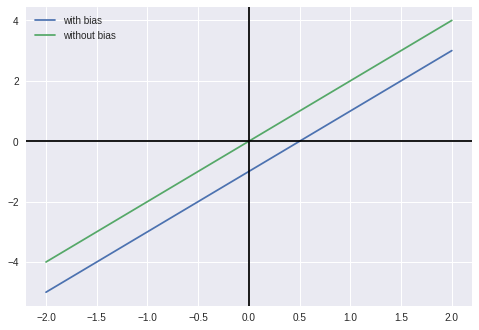

In [26]:
def with_bias(x):
    return(x*W + b)

def without_bias(x):
    return(x*W)

W = 2.0
b = -1.0

x = np.linspace(-2,2,41)
y_bias = with_bias(x)
y_no_bias = without_bias(x)

plt.plot(x,y_bias,label='with bias')
plt.plot(x,y_no_bias,label='without bias')
plt.axhline(0,c='black')
plt.axvline(0,c='black')
plt.legend()
plt.show()

Addition works very simply, you just add things as you'd expect.

##### Examples:

$\left[ \begin{array}{ccc} 
1 & 2 & 3
\end{array} \right] 
+ 6
= 
\left[ \begin{array}{ccc} 
7 & 8 & 9
\end{array} \right]
$

---

$\left[ \begin{array}{ccc} 
1 & 2 & 3 \\
4 & 5 & 6
\end{array} \right] 
+ 6
= 
\left[ \begin{array}{ccc} 
7 & 8 & 9 \\
10 & 11 & 12
\end{array} \right]
$

---

$\left[ \begin{array}{ccc} 
1 & 2 & 3 \\
4 & 5 & 6
\end{array} \right] 
+
\left[ \begin{array}{ccc} 
1 & 2 & 3 \\
4 & 5 & 6
\end{array} \right] 
= 
\left[ \begin{array}{ccc} 
2 & 4 & 6 \\
8 & 10 & 12
\end{array} \right]
$

---

$\left[ \begin{array}{ccc} 
1 & 2 & 3 \\
4 & 5 & 6
\end{array} \right] 
+
\left[ \begin{array}{ccc} 
1 & 2 & 3
\end{array} \right] 
= 
\left[ \begin{array}{ccc} 
2 & 4 & 6 \\
5 & 7 & 9
\end{array} \right]
$

### Activation 

[activation functions](https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0)

We use activation functions at each hidden layer after $XW + b$.

The activations functions act as non-linearities.

This is so our NN can model non-linear functions as just multiplying and adding cant.

We are using ReLU (**Rectified Linear Unit**)

$r(x) = \max(x,0)$

In [0]:
def relu(x):
    x = np.maximum(0,x)
    return(x)

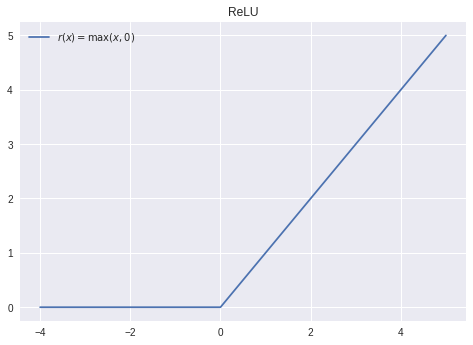

In [28]:
x = np.arange(10)-4
y = relu(x)
plt.plot(x,y,label=r'$r(x) = \max(x,0)$')
plt.title('ReLU')
plt.legend()
plt.show()

ReLU is very common and the default activation function that people tend to use.

### Implementing in Tensorflow

With Tensorflow, we define-and-run, which means define everything and then run stuff when its ready.

The code below isn't being run (we haven't inputted anything in the placeholder).

It's just being defined so we can call and run it later.

In [0]:
# we first matrix multiply with tf.matmul
# then add bias with +b1
# then apply relu with tf.nn.relu
hidden = tf.nn.relu(tf.matmul(X_placeholder, W1) + b1)

## Loss

This is a kind of measurement of how bad the model is doing.

In a lot of cases, it is the difference between the logits (predictions) and labels (answers).

In Gradient descent, we use calculus to adjust the variables to reduce the loss.

### Softmax

Softmax ($\sigma$) changes all the predicted values into probabilities (summing to 1)

given $z = xW + b$

### $\sigma(z)_j = \frac{\exp(z_j)}{\sum_{k=1}^K\exp(z_k)}$ for $j = 1,...,K$

---

Below we have 4 graphs, 1 contains the outputs from the NN, and 3 with different normalization techniques.

Softmax benefits:
- It normalizes it so it sums to 1
- We can easily differentiate it, unlike hardmax
- It's mass can easily get put on to one class
- It considers the values and not just the ratios of the values
        
For more information on softmax and cross entropy (and finding their derivatives), go [here](https://deepnotes.io/softmax-crossentropy)

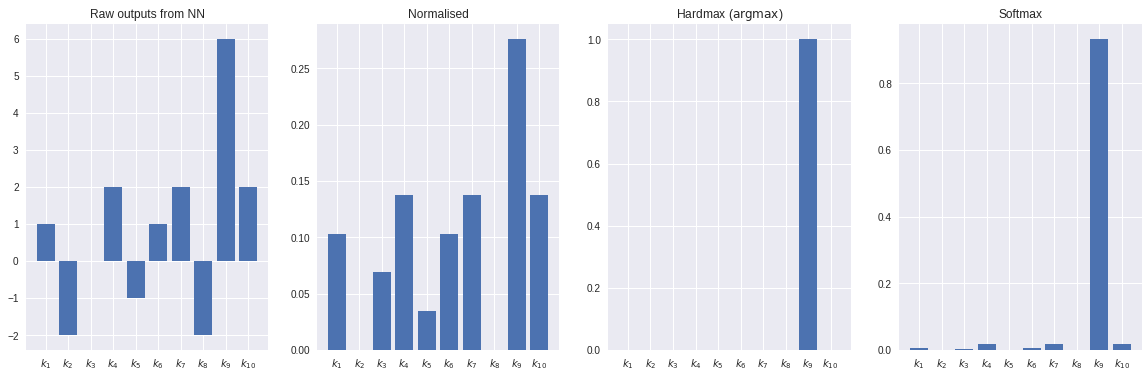

In [30]:
fig,ax = plt.subplots(1, 4, figsize=(20,6))
helper.softmax_graphs(ax)

### Cross Entropy

Cross entropy is from information theory, it kind of measures the difference between a predicted and true underlying discrete probability distribution.

Specifically, it measures the expected number of bits used to define an event using a coding scheme optimized for a predicted (unnatural) distribution, rather than the true underlying distribution.

We want to minimize it.

### $H(y,\hat{y}) = -\sum_iy_i\log_2\hat{y}_i$

In our case, $L = -\sum_iy_i\ln\sigma(o)_i$

- the log prevents some underflow caused by softmax (when computer cant handle numbers too small, they will round to 0)
- information theory uses $\log_2$ (because of bits), ML uses $\ln$ (because the derivative is easy to calculate)

### Loss in Tensorflow

It only takes 1 line.

We can implement softmax and cross entropy in 1 function.

We take the mean so that later when we take the derivative, because of the chain rule, we will take the average step rather than summing all steps of the batch.

Again, we are just defining it rather than running it.

In [0]:
# with tensorflow, we can implement all this in 1 line

# labels = expected outputs
# logits = NN output
# we take the mean loss of the whole batch so we take the mean step during gradient descent
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y_placeholder, logits=Y_prediction))

## Gradient Descent

This is the process we use to update the variables to decrease the loss.

The idea is to use calculus to work out whether increasing or decreasing a value will improve or worsen the loss.

The process:

1. calculate the partial derivative of each variable
2. subtract the derivative multiplied by the learning rate from the chosen variable
3. carry on with step 2 for each layer of variables

### $W_{(t+1)} = W_{(t)} - \epsilon L_W\prime$

When calculating the gradients, we go backwards through the NN (because we need to use the chain rule), this is where the name back propagation comes from.


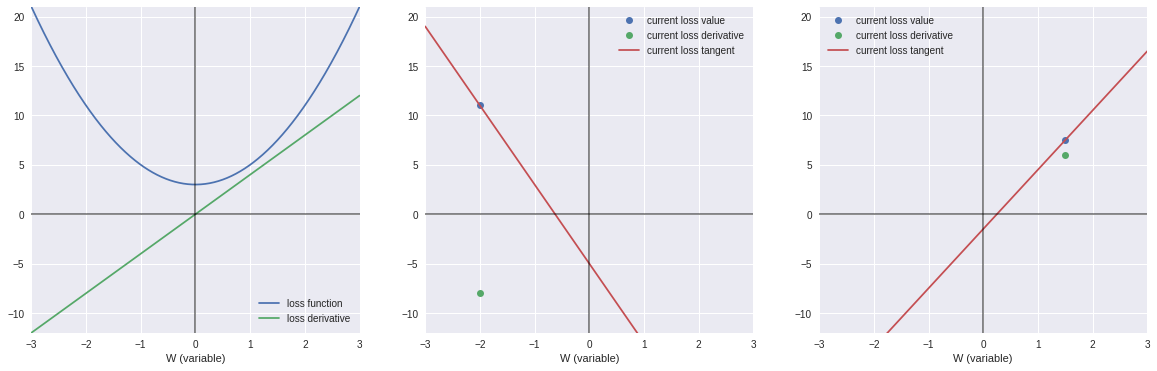

In [32]:
fig,ax = plt.subplots(1, 3, figsize=(20,6))
helper.loss_optimization(ax)

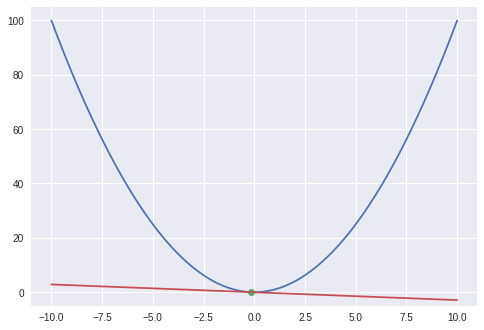

In [33]:
anim = helper.animate_gradient_descent(frames=20, lr=0.1, start=-10)
HTML(anim.to_jshtml())

### Computing Gradients

Since we are using Linear Algebra, we need to calculate the partial derivative of each value in each variable.

**partial derivative:** (with $L$ as the loss)

## $\frac{\partial L}{\partial w_{i,j}}$

We are also using many functions (layers) so we use the chain rule.

**chain rule:**

## $f(g(x))\prime = f\prime(g(x)) g\prime(x)$

## $\frac{dz}{dx} = \frac{dz}{dy}\cdot\frac{dy}{dx}$

**Our functions:**

## $L = H(\sigma(r(XW_1 + b_1)W_2 + b_2))$

We are updating $W_1$, $b_1$, $W_2$ and $b_2$

To do this we need to calculate the gradient of the outer functions and multiply (use chain rule) with the gradient of the function of that variable.

This would look like (for $W_2$):

## $L\prime = \frac{\partial L}{\partial p}\frac{\partial p}{\partial o}\frac{\partial o}{\partial w_{2_{i,j}}}$

with:
- $o = r(XW_1 + b_1)W_2 + b_2$
- $p = \sigma(r(XW_1 + b_1)W_2 + b_2)$

---

The first partial derivative we calculate is $\frac{\partial L}{\partial o}$.

This is the derivative of the **cross entropy** function:

## $L= -\sum_iy_i\ln p_i$

## $\frac{\partial L}{\partial p_j} = -y_j\frac{1}{p_j}$

---

Now we multiply this by the derivative of the **softmax** function:

## $\sigma(o)_j = \frac{e^{o_j}}{\sum_k e^{o_k}}$ 

if $i = j$:

## $\frac{\partial p_j}{\partial o_i} = \frac{e^{o_j}\sum_k e^{o_k} - e^{o_i}e^{o_j}}{(\sum_k e^{o_k})^2}$

## $\frac{\partial p_j}{\partial o_i} = \frac{e^{o_j}(\sum_k e^{o_k} - e^{o_i})}{(\sum_k e^{o_k})^2}$

## $\frac{\partial p_j}{\partial o_i} = \frac{e^{o_j}}{\sum_k e^{o_k}} \cdot \frac{\sum_k e^{o_k} - e^{o_i}}{\sum_k e^{o_k}}$
 
## $\frac{\partial p_j}{\partial o_i} = p_j(1-p_i)$
 
if $ i\not= j$:
 
## $\frac{\partial p_j}{\partial o_i} = \frac{0 - e^{o_i}e^{o_j}}{(\sum_k e^{o_k})^2}$
 
## $\frac{\partial p_j}{\partial o_i} = \frac{- e^{o_i}}{\sum_k e^{o_k}} \cdot \frac{e^{o_j}}{\sum_k e^{o_k}}$
 
## $\frac{\partial p_j}{\partial o_i} = -p_ip_j$
 
## $\delta_{ij} =
    \begin{cases}
            1 & \text{if } i=j,\\
            0 & \text{if } i\neq j.
    \end{cases}$
 
## $\frac{\partial p_j}{\partial o_i} = p_j(\delta_{ij}-p_i)$

**multiplying with cross entropy derivative:**
 
## $\frac{\partial L}{\partial o_i} = \frac{\partial L}{\partial p}\frac{\partial p}{\partial o_i}$
 
## $\frac{\partial L}{\partial o_i} = -y_i\frac{1}{p_i}p_i(1-p_i)-\sum_{j\not=i}y_j\frac{1}{p_j}(-p_jp_i)$
 
## $\frac{\partial L}{\partial o_i} = -y_i(1-p_i)-\sum_{j\not=i}y_j\frac{1}{p_j}(-p_jp_i)$
 
## $\frac{\partial L}{\partial o_i} = -y_i(1-p_i)+\sum_{j\not=i}y_j\frac{1}{p_j}p_jp_i$
 
## $\frac{\partial L}{\partial o_i} = -y_i(1-p_i)+\sum_{j\not=i}y_jp_i$
 
## $\frac{\partial L}{\partial o_i} = -y_i+y_ip_i+\sum_{j\not=i}y_jp_i$
 
## $\frac{\partial L}{\partial o_i} = p_i(\sum_{j}y_j) -y_i$
 
## $\frac{\partial L}{\partial o_i} = p_i -y_i$

---

Now lets update $W_2$, we need to **calculate the derivative of $W_2$** and multiply it by the derivative we just calculated above:

with:
- $z = r(XW_1 + b_1)$
 
## $\frac{\partial o_i}{\partial W_{2_{j,i}}} = z_j$
 
## $\frac{\partial o_i}{\partial W_{2_{:,i}}} = z$
 
## $\frac{\partial o}{\partial W_{2}} = 
\left[ \begin{array}{ccc} 
| & | & | \\
z^T & z^T & z^T \\
| & | & |
\end{array} \right]$
 
## $\frac{\partial L}{\partial W_{2}} = 
\left[ \begin{array}{ccc} 
|  \\
z^T \\
|
\end{array} \right]
\left[ \begin{array}{ccc} 
p_0-y_0 & \dots & p_I-y_I
\end{array} \right]$

---

When we input batches, we do the same thing as the linear algebra still works fine.

We just need to remember to take the average step (divide by batch size before making the update).

### Updating Variables

To update the variables, all we do is subtract the gradient multiplied by the learning rate.

## $W_2^{t+1} = W_2^{t} - \epsilon L_{W_2}\prime$

with:
- $\epsilon =$ learning rate

This is the most simple version of gradient descent.

There are many variants of gradient descent but they all use this as the basic principle.

[more variants and explanations](http://ruder.io/optimizing-gradient-descent/)

### Implementing in Tensorflow

Again, this can be done in 1 line.

We choose the optimizer `tf.train.GradientDescentOptimizer()` and set the learning rate.

We then define the operations by setting `minimize(loss)` which will compute the gradients and than apply them to selected variables (defaults to all trainiable vars).

Again, we are just defining the ops in the main graph and they will only run when called.

In [0]:
# gradient descent optimizer

# we input the learning rate and set it to minimize the loss value
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

## Training



### Tensorflow Graphs and Sessions

**1. We first create a Tensorflow graph**

We don't code this as tensorflow will use the default graph if we dont set anything.

This is how we would make a graph though:



In [0]:
# create the graph
graph = tf.Graph()

# we can create all the ops within this block
with graph.as_default():
    
    # next step

**2. define all the operations within the graph (all placeholder, variables, loss, hidden layers, etc)**

We've already done this with.

We've set:
- `X_placeholder`
- `Y_placeholder`
- `W1`, `b1`, `W2`, `b2`
- `hidden`
- `Y_prediction`
- `loss`
- `optimizer`
- `accuracy`

In [0]:
# we can set values with default grpah like this
test_constant1 = tf.constant(np.random.randint(0,10,5), dtype=tf.float32)
output1 = tf.square(test_constant1)

# or in a graph like above like this
# create the graph
graph = tf.Graph()

# we can create all the ops within this block
with graph.as_default():
    
    test_constant2 = tf.constant(np.random.randint(0,10,5), dtype=tf.float32)
    output2 = tf.square(test_constant2)

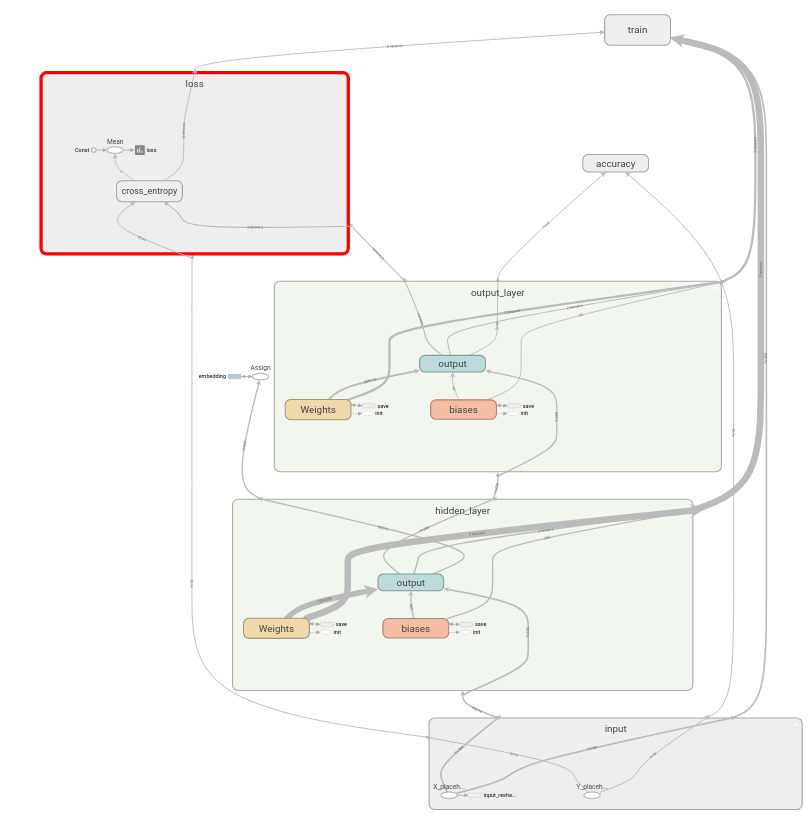

In [36]:
# Diagram of graph in tensorboard
Image('/content/Neural_Networks-101-demo/imgs/tf_graph.png',width=1000)

**3. create a session which allows us to run any ops in the graph**

We want to create 1 session to be able to run all our ops and keep our variables.

There are multiple ways to create a session.

In a Jupyter notebook, we need to access the same session from different cells (otherwise we'd have to save the model to keep our variables).

We do this with `tf.InteractiveSession` or `tf.Session` 

(interactive session makes this the default session so less typing)

In [38]:
# define the session using default graph
sess = tf.InteractiveSession()

# we can now run ops
print(sess.run(test_constant1))
print(sess.run(output1))

[8. 9. 9. 8. 9.]
[64. 81. 81. 64. 81.]


In [0]:
# notice how we cant run ops in the other graph
print(sess.run(output2))

In [40]:
# we need to create a session to use that other graph

# define the session using new graph
sess2 = tf.InteractiveSession(graph = graph)

# we can now run ops from the other graph
print(sess2.run(test_constant2))
print(sess2.run(output2))

[8. 3. 5. 8. 0.]
[64.  9. 25. 64.  0.]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


**4. Initialize all variables**

The Tensorflow variables values haven't actually been set, so we need to initialize them before running any ops.

We need to run `tf.global_variables_initializer()` with the created session.

In [0]:
# create variable
test_variable = tf.Variable(np.random.randn(10),dtype=tf.float32)

# create session
sess = tf.InteractiveSession()

# show variable (doesn't work)
print(sess.run(test_variable))

In [42]:
# create variable
test_variable = tf.Variable(np.random.randn(10),dtype=tf.float32)

# create session
sess = tf.InteractiveSession()
# initialize variables
sess.run(tf.global_variables_initializer())

# show variable
print(sess.run(test_variable))

[-0.18205175  0.87149906  0.76132464  0.36902946 -0.36410505  0.09237985
 -0.37552226  2.1598887   2.2632716  -0.27618954]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


**5. use the created session to run any ops**

Now we can run all the ops we want like above.

Notice how we dont need to choose all ops to run, if we run an op which uses another op as an input, it will automatically run the other op for us.

### Training process

The basic algorithm:

    loop for epochs:

        loop for iterations:

            get inputs and labels batch
            
            complete forward pass
            
            calculate loss
            
            complete back pass
            
---

We also record the losses over time in an array to see how it trained after.

We also show the current loss and validation accuracy thorugh training to see performance.

---

With Tensorflow, we use `feed_dict` in the run line to input values to placeholders.

## Testing

We want to test the performance of our model on the testing set.

We call the accuracy op and input the testing data set.

This runs the forward pass and calculates the accuracy given the predictions and the labels.

This means it doesn't run the back pass to no changes to the NN are made.